In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('rock_density_xray.csv')

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [4]:
df.columns = ['Signal', 'Density']

<AxesSubplot:xlabel='Signal', ylabel='Density'>

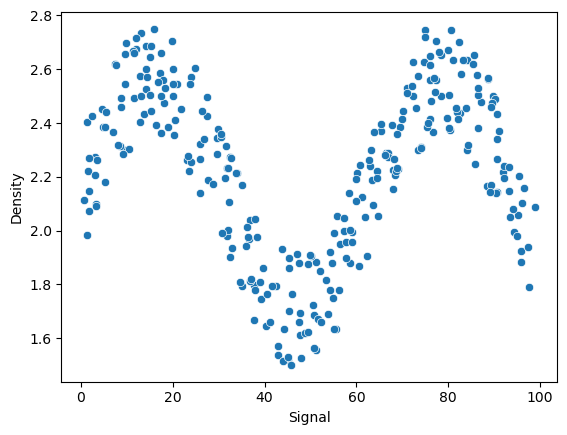

In [5]:
sns.scatterplot(x = 'Signal', y = 'Density', data=df)

In [6]:
X = df['Signal'].values.reshape(-1,1)

In [7]:
y = df['Density']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr_model = LinearRegression()

In [13]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [14]:
lr_preds = lr_model.predict(X_test)

In [15]:
lr_preds

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [17]:
mean_absolute_error(y_test, lr_preds)

0.211198973318633

In [21]:
signal_range = np.arange(0,100)
signal_preds = lr_model.predict(signal_range.reshape(-1,1))

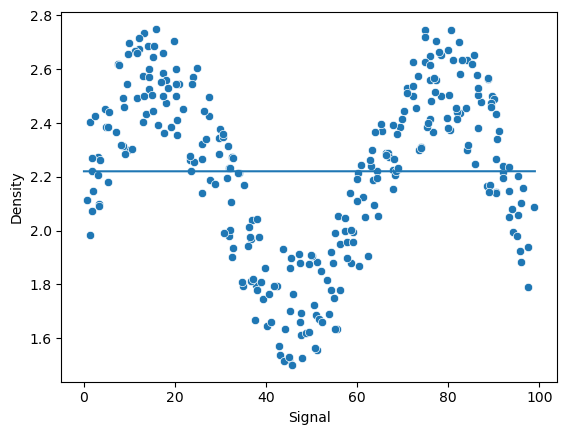

In [22]:
sns.scatterplot(x = 'Signal', y = 'Density', data=df)

plt.plot(signal_range, signal_preds)

In [24]:
def run_model(model,X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    print(f'RMSE:{rmse}')
    print(f'MAE:{mae}')
    signal_range = np.arange(0,100)
    signal_preds = model.predict (signal_range.reshape(-1,1))
    sns.scatterplot(x = 'Signal', y = 'Density', data=df, color = 'red')
    plt.plot(signal_range, signal_preds)

RMSE:0.2570051996584629
MAE:0.211198973318633


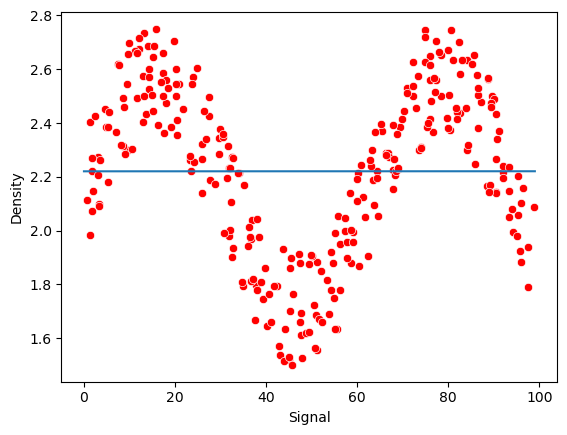

In [25]:
model=LinearRegression()
run_model(model,X_train, y_train, X_test, y_test)

In [26]:
from sklearn.pipeline import make_pipeline

In [27]:
from sklearn.preprocessing import PolynomialFeatures

RMSE:0.13807484156264238
MAE:0.11969149629011992


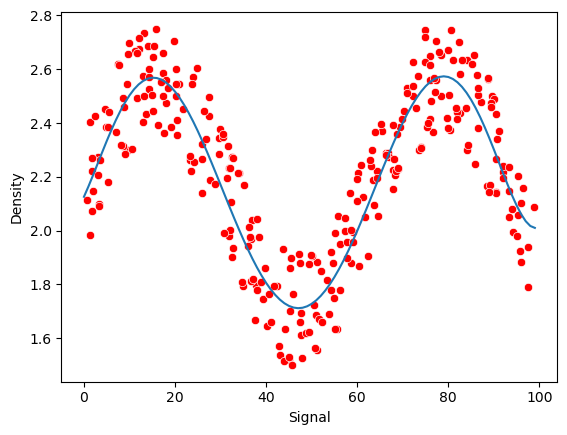

In [37]:
pipe = make_pipeline(PolynomialFeatures(degree=6),LinearRegression())
run_model(pipe,X_train, y_train, X_test, y_test)

In [38]:
from sklearn.neighbors import KNeighborsRegressor

RMSE:0.1397499127378895
MAE:0.1207030971917154


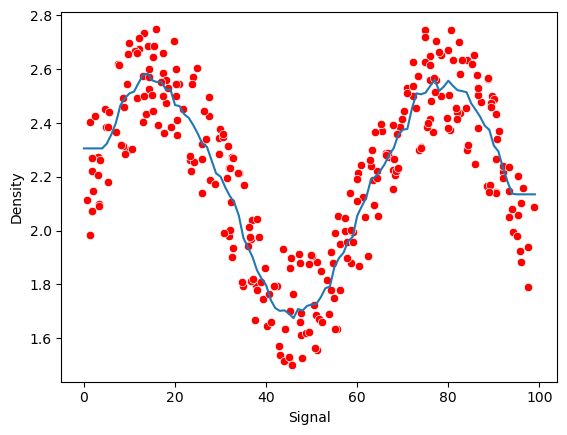

In [44]:
k_values = [20]
for n in k_values:
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train, y_train, X_test, y_test)

In [45]:
from sklearn.tree import DecisionTreeRegressor

In [46]:
model = DecisionTreeRegressor()

RMSE:0.1523487028635337
MAE:0.11877297474442378


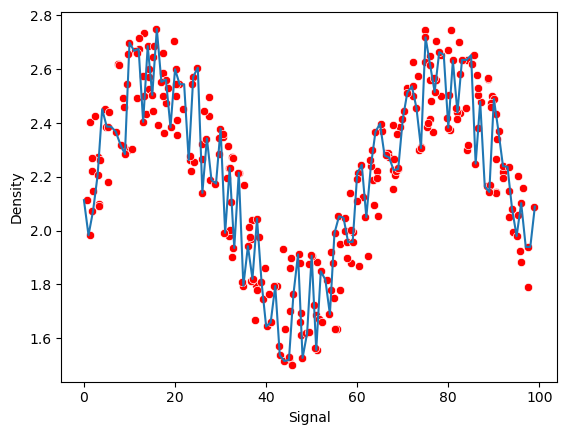

In [47]:
run_model(model,X_train, y_train, X_test, y_test)

In [48]:
from sklearn.svm import SVR

In [49]:
from sklearn.model_selection import GridSearchCV

RMSE:0.12646999302046696
MAE:0.10854210121348368


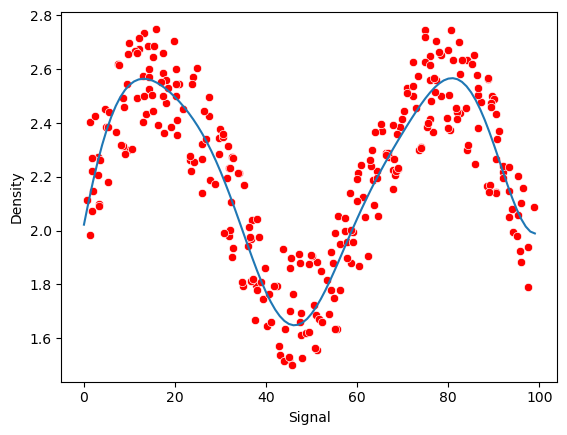

In [52]:
svr = SVR()
param_grid = {'C':[0.01,0.1,1,5,10,100,1000],
            'gamma':['auto', 'scale']}
grid = GridSearchCV(svr, param_grid)
run_model(grid,X_train, y_train, X_test, y_test)

In [53]:
from sklearn.ensemble import RandomForestRegressor

RMSE:0.13226777976368967
MAE:0.11225340335434743


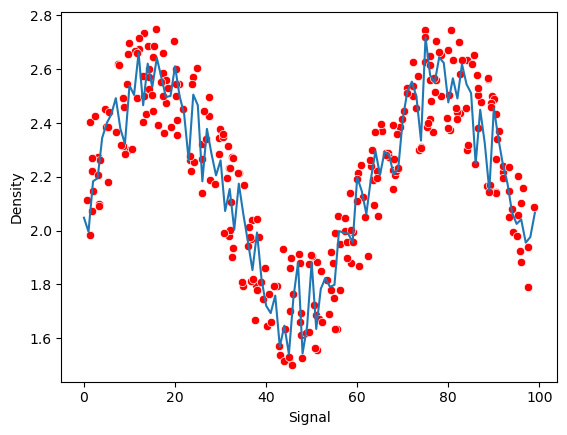

In [55]:
rfr = RandomForestRegressor(n_estimators = 10)
run_model(rfr,X_train, y_train, X_test, y_test)

In [56]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

RMSE:0.13294148649584667
MAE:0.11318284854800689


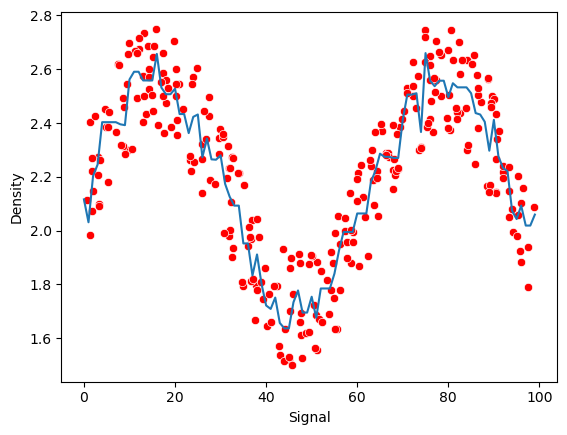

In [57]:
model = GradientBoostingRegressor()
run_model(model,X_train, y_train, X_test, y_test)

RMSE:0.13244624622733028
MAE:0.11444900799638193


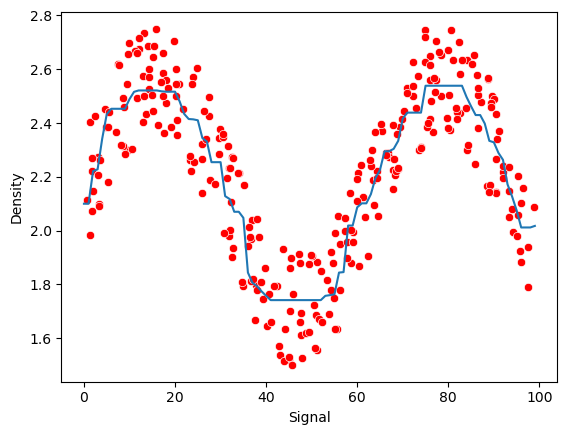

In [58]:
model = AdaBoostRegressor()
run_model(model,X_train, y_train, X_test, y_test)